你可以從
[Bookshop.org](https://bookshop.org/a/98697/9781098155438) 和
[Amazon](https://www.amazon.com/_/dp/1098155432?smid=ATVPDKIKX0DER&_encoding=UTF8&tag=oreilly20-20&_encoding=UTF8&tag=greenteapre01-20&linkCode=ur2&linkId=e2a529f94920295d27ec8a06e757dc7c&camp=1789&creative=9325)
訂購《Think Python 3e》的實體書和電子書版本。

In[5]: # 譯註：Jupyter Notebook 的 In[X] 編號可能與原文不同，不影響程式碼

In [1]:
from os.path import basename, exists

In [2]:
def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("已下載 " + str(local)) # 譯註：這裡顯示下載完成的檔案路徑
    return filename

In [3]:
download('https://github.com/AllenDowney/ThinkPython/raw/v3/thinkpython.py');
download('https://github.com/AllenDowney/ThinkPython/raw/v3/diagram.py');

In [4]:
import thinkpython

# 回傳值 (Return Values)

在之前的章節中，我們用過內建函式——像是 `abs` 和 `round`——以及 math 模組中的函式——像是 `sqrt` 和 `pow`。

當你呼叫這些函式時，它會回傳一個值，你可以將這個值賦予給一個變數，或者用作運算式的一部分。

到目前為止，我們寫的函式則不同。
有些使用 `print` 函式來顯示值，有些使用海龜函式來畫圖。
但它們不會回傳我們可以賦予給變數或在運算式中使用的值。

在這一章，我們將學習如何編寫會回傳值的函式。

## 有些函式有回傳值

當你呼叫像 `math.sqrt` 這樣的函式時，結果稱為 **回傳值** (return value)。
如果函式呼叫出現在儲存格的末尾，Jupyter 會立即顯示回傳值。

In [5]:
import math

In [6]:
math.sqrt(42 / math.pi)

3.656366395715726

如果你將回傳值賦予給一個變數，它就不會被顯示出來。

In [8]:
radius = math.sqrt(42 / math.pi)

但你之後可以顯示它。

In [9]:
radius

3.656366395715726

或者你可以將回傳值用作運算式的一部分。

In [10]:
radius + math.sqrt(42 / math.pi)

7.312732791431452

這裡有一個回傳值的函式範例。

In [12]:
def circle_area(radius_param): # 譯註：參數名改為 radius_param 以區別外面的 radius
    area_val = math.pi * radius_param**2 # 譯註：變數名改為 area_val
    return area_val

`circle_area` 接受 `radius_param` 作為參數，並計算該半徑圓形的面積。

最後一行是一個 `return` 陳述句，它回傳 `area_val` 的值。

如果我們像這樣呼叫函式，Jupyter 會顯示回傳值。


In [13]:
circle_area(radius) # 譯註：這裡的 radius 是之前 In[7] 定義的

42.00000000000001

我們可以將回傳值賦予給一個變數。

In [14]:
a = circle_area(radius)

或者將它用作運算式的一部分。

In [15]:
circle_area(radius) + 2 * circle_area(radius / 2)

63.000000000000014

稍後我們可以顯示我們賦予結果的變數的值。

In [16]:
a

42.00000000000001

In [17]:
area_val

NameError: name 'area_val' is not defined

但是我們無法存取 `area_val`。

get_ipython().run_cell_magic('expect', 'NameError', '\narea_val\n')
譯註：預期 NameError，因為 area_val 是 circle_area 函式內的區域變數

`area_val` 是函式中的區域變數，所以我們無法從函式外部存取它。

## 有些則回傳 None

如果函式沒有 `return` 陳述句，它會回傳 `None`，這是一個像 `True` 和 `False` 一樣的特殊值。
例如，這是第 3 章中的 `repeat` 函式。

In [18]:
def repeat(word, n):
    print(word * n)

如果我們像這樣呼叫它，它會顯示蒙提·派森歌曲「芬蘭」的第一行。

In [19]:
repeat('芬蘭，', 3) # 譯註：將英文改為中文

芬蘭，芬蘭，芬蘭，


這個函式使用 `print` 函式來顯示字串，但它沒有使用 `return` 陳述句來回傳值。
如果我們將結果賦予給一個變數，它仍然會顯示字串。

In [20]:
result = repeat('芬蘭，', 3)

芬蘭，芬蘭，芬蘭，


如果我們顯示變數的值，什麼也看不到。

In [21]:
result

`result` 實際上是有值的，但 Jupyter 不會顯示它。
不過，我們可以像這樣顯示它。

In [22]:
print(result)

None


`repeat` 的回傳值是 `None`。

現在這裡有一個類似 `repeat` 的函式，但它有回傳值。

In [23]:
def repeat_string(word, n):
    return word * n

注意，我們可以在 `return` 陳述句中使用運算式，而不僅僅是變數。

有了這個版本，我們可以將結果賦予給一個變數。
當函式執行時，它不會顯示任何東西。

In [26]:
line = repeat_string('午餐肉，', 8) # 譯註：將英文改為中文

但稍後我們可以顯示賦予給 `line` 的值。

In [27]:
line

'午餐肉，午餐肉，午餐肉，午餐肉，午餐肉，午餐肉，午餐肉，午餐肉，'

像這樣的函式稱為 **純函式** (pure function)，因為它不會顯示任何東西或有任何其他效果——除了回傳一個值。

## 回傳值與條件判斷

如果 Python 沒有提供 `abs` (絕對值函式)，我們可以像這樣寫。

In [28]:
def absolute_value(x_val): # 譯註：參數名改為 x_val
    if x_val < 0:
        return -x_val
    else:
        return x_val

如果 `x_val` 是負數，第一個 `return` 陳述句會回傳 `-x_val`，函式立即結束。
否則，第二個 `return` 陳述句會回傳 `x_val`，函式結束。
所以這個函式是正確的。

然而，如果你將 `return` 陳述句放在條件判斷中，你必須確保程式中所有可能的路徑都會碰到一個 `return` 陳述句。
例如，這是一個不正確的 `absolute_value` 版本。

In [29]:
def absolute_value_wrong(x_val): # 譯註：參數名改為 x_val
    if x_val < 0:
        return -x_val
    if x_val > 0: # 譯註：如果 x_val 是 0，兩個 if 都不會執行
        return x_val

如果我們用 `0` 作為引數呼叫這個函式，會發生以下情況。

In [30]:
absolute_value_wrong(0)

我們什麼也得不到！問題在這裡：當 `x_val` 是 `0` 時，兩個條件都不成立，函式在沒有碰到 `return` 陳述句的情況下結束，這意味著回傳值是 `None`，所以 Jupyter 什麼也不顯示。

作為另一個例子，這裡有一個在結尾帶有額外 `return` 陳述句的 `absolute_value` 版本。

In [31]:
def absolute_value_extra_return(x_val): # 譯註：參數名改為 x_val
    if x_val < 0:
        return -x_val
    else:
        return x_val

    return '這是永遠執行不到的程式碼' # 譯註：將英文改為中文

如果 `x_val` 是負數，第一個 `return` 陳述句會執行，函式結束。
否則第二個 `return` 陳述句會執行，函式結束。
無論哪種方式，我們永遠不會到達第三個 `return` 陳述句——所以它永遠不會執行。

永遠無法執行的程式碼稱為 **無效程式碼** (dead code) 或 **死碼**。
一般來說，無效程式碼不會造成任何傷害，但它通常表示存在誤解，並且可能會讓試圖理解程式的人感到困惑。

## 漸進式開發 (Incremental development)

當你編寫更大的函式時，你可能會發現自己花費更多時間在除錯上。
為了處理日益複雜的程式，你可能想嘗試 **漸進式開發** (incremental development)，這是一種一次只增加和測試少量程式碼的方法。

舉個例子，假設你想找出由座標 $(x_1, y_1)$ 和 $(x_2, y_2)$ 表示的兩點之間的距離。
根據畢氏定理，距離是：

$$\mathrm{distance} = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$$

第一步是思考 `distance` 函式在 Python 中應該是什麼樣子——也就是說，輸入（參數）是什麼，輸出（回傳值）是什麼？

對於這個函式，輸入是點的座標。
回傳值是距離。
你可以立即寫出函式的輪廓：

In [32]:
def distance(x1, y1, x2, y2):
    return 0.0

這個版本還沒有計算距離——它總是回傳零。
但它是一個帶有回傳值的完整函式，這意味著你可以在使其更複雜之前對其進行測試。

為了測試新的函式，我們將用範例引數呼叫它：

In [33]:
distance(1, 2, 4, 6)

0.0

我選擇這些值是為了讓水平距離是 `3`，垂直距離是 `4`。
這樣，結果就是 `5`，一個 `3-4-5` 直角三角形的斜邊。在測試函式時，知道正確答案很有用。

到目前為止，我們已經確認函式可以執行並回傳一個值，我們可以開始向主體中添加程式碼了。
一個好的下一步是找出差值 `x2 - x1` 和 `y2 - y1`。
這裡有一個版本，將這些值儲存在臨時變數中並顯示它們。

In [34]:
def distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    print('dx 是', dx) # 譯註：將英文改為中文
    print('dy 是', dy)
    return 0.0

如果函式運作正常，它應該顯示 `dx 是 3` 和 `dy 是 4`。
如果是這樣，我們就知道函式得到了正確的引數並且正確地執行了第一個計算。如果不是，只需要檢查幾行程式碼。

In [35]:
distance(1, 2, 4, 6)

dx 是 3
dy 是 4


0.0

目前為止還不錯。接下來我們計算 `dx` 和 `dy` 的平方和：

In [37]:
def distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    cc = dx**2 + dy**2
    print('dsquared 是：', cc) # 譯註：將英文改為中文
    return 0.0

同樣，我們可以執行函式並檢查輸出，輸出應該是 `25`。

In [38]:
distance(1, 2, 4, 6)

dsquared 是： 25


0.0

最後，我們可以使用 `math.sqrt` 來計算距離：

In [39]:
def distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    dsquared = dx**2 + dy**2
    result_val = math.sqrt(dsquared) # 譯註：變數名改為 result_val
    print("result_val 是", result_val) # 譯註：將英文改為中文

並測試它。

In [40]:
distance(1, 2, 4, 6)

result_val 是 5.0


結果是正確的，但是這個版本的函式是顯示結果而不是回傳它，所以回傳值是 `None`。

我們可以透過將 `print` 函式替換為 `return` 陳述句來修正這個問題。

In [41]:
def distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    dsquared = dx**2 + dy**2
    result_val = math.sqrt(dsquared) # 譯註：變數名改為 result_val
    return result_val

這個版本的 `distance` 是一個純函式。
如果我們像這樣呼叫它，只會顯示結果。

In [42]:
distance(1, 2, 4, 6)

5.0

如果我們將結果賦予給一個變數，則什麼也不會顯示。

In [231]:
d = distance(1, 2, 4, 6)

我們編寫的 `print` 陳述句對於除錯很有用，但是一旦函式運作正常，我們就可以移除它們。
像這樣的程式碼稱為 **鷹架** (scaffolding)，因為它有助於建構程式，但不是最終產品的一部分。

這個例子展示了漸進式開發。
這個過程的關鍵方面是：

1.  從一個可運作的程式開始，進行小的更改，並在每次更改後進行測試。

2.  使用變數來儲存中間值，以便你可以顯示和檢查它們。

3.  一旦程式運作正常，移除鷹架。

在任何時候，如果出現錯誤，你都應該很清楚問題出在哪裡。
漸進式開發可以為你節省大量的除錯時間。

## 布林函式 (Boolean functions)

函式可以回傳布林值 `True` 和 `False`，這通常很方便地將複雜的測試封裝在函式中。
例如，`is_divisible` 檢查 `x` 是否能被 `y` 整除而沒有餘數。

In [43]:
def is_divisible(x_val, y_val): # 譯註：參數名修改
    if x_val % y_val == 0:
        return True
    else:
        return False

In [ ]:
def is_divisible(x_val, y_val): # 譯註：參數名修改
    return True if x_val % y_val == 0 else False # 譯註：將 if-else 簡化為一行

我們可以這樣使用它。

In [44]:
is_divisible(6, 4)

False

In [45]:
is_divisible(6, 3)

True

在函式內部，`==` 運算子的結果是一個布林值，所以我們可以透過直接回傳它來更簡潔地編寫
函式。

In [46]:
def is_divisible(x_val, y_val): # 譯註：參數名修改
    return x_val % y_val == 0

布林函式經常用於條件陳述句中。

In [48]:
if is_divisible(6, 5):
    print('可以整除') # 譯註：將英文改為中文

有人可能會想這樣寫：

In [49]:
if is_divisible(6, 2) == True: # 譯註：多此一舉的比較
    print('可以整除')

可以整除


但是這個比較是不必要的。

## 帶有回傳值的遞迴

現在我們可以編寫帶有回傳值的函式了，我們也可以編寫帶有回傳值的遞迴函式，

有了這個能力，我們就跨過了一個重要的門檻——我們所擁有的 Python 子集現在是 **圖靈完備** (Turing complete) 的，這意味著我們可以執行任何可以用演算法描述的計算。

為了展示帶有回傳值的遞迴，我們將評估一些遞迴定義的數學函式。
遞迴定義類似於循環定義，因為定義中會引用被定義的事物。一個真正的循環定義並不是很有用：

> 沃泊爾 (vorpal)：一個用來描述某事物是沃泊爾的形容詞。

如果你在字典裡看到這個定義，你可能會感到惱火。
另一方面，如果你查閱階乘函式的定義，用符號 $!$ 表示，你可能會得到這樣的東西：

$$\begin{aligned}
0! &= 1 \\
n! &= n \cdot (n-1)!
\end{aligned}$$

這個定義說 $0$ 的階乘是 $1$，而任何其他值 $n$ 的階乘是 $n$ 乘以 $n-1$ 的階乘。

如果你能寫出某事物的遞迴定義，你就能寫一個 Python 程式來評估它。
遵循漸進式開發的過程，我們將從一個接受 `n` 作為參數並總是回傳 `0` 的函式開始。

In [50]:
def factorial(n_param): # 譯註：參數名修改
    return 0

現在讓我們加入定義的第一部分——如果引數恰好是 `0`，我們只需要回傳 `1`：

In [51]:
def factorial(n_param): # 譯註：參數名修改
    if n_param == 0:
        return 1
    else:
        return 0

現在讓我們填寫第二部分——如果 `n_param` 不是 `0`，我們必須進行遞迴
呼叫來找出 `n_param-1` 的階乘，然後將結果乘以 `n_param`：

In [52]:
def factorial(n_param): # 譯註：參數名修改
    if n_param == 0:
        return 1
    else:
        recurse_result = factorial(n_param-1) # 譯註：變數名修改
        return n_param * recurse_result

這個程式的執行流程類似於第 5 章中 `countdown` 的流程。
如果我們用值 `3` 呼叫 `factorial`：

由於 `3` 不是 `0`，我們走第二個分支並計算
`n_param-1` 的階乘…

> 由於 `2` 不是 `0`，我們走第二個分支並計算
> `n_param-1` 的階乘…
>
> > 由於 `1` 不是 `0`，我們走第二個分支並計算
> > `n_param-1` 的階乘…
> >
> > > 由於 `0` 等於 `0`，我們走第一個分支並回傳 `1` 而不
> > > 進行任何更多的遞迴呼叫。
> >
> > 回傳值 `1` 乘以 `n_param`（即 `1`），結果被回傳。
>
> 回傳值 `1` 乘以 `n_param`（即 `2`），結果被回傳。

回傳值 `2` 乘以 `n_param`（即 `3`），結果 `6` 成為啟動整個
過程的函式呼叫的回傳值。

下圖顯示了此函式呼叫序列的堆疊圖。

In [241]:
from diagram import Frame, Stack, make_binding # 譯註：這是書中用來畫圖的工具

In [242]:
main_frame = Frame([], name='__main__', loc='left') # 譯註：變數名修改
frames = [main_frame]

In [243]:
ns_vals = [3, 2, 1] # 譯註：變數名修改
recurses_vals = [2, 1, 1] # 譯註：變數名修改
results_vals = [6, 2, 1] # 譯註：變數名修改

In [244]:
for n_val, recurse_val, result_val in zip(ns_vals, recurses_vals, results_vals):
    binding1 = make_binding('n_param', n_val) # 譯註：使用修改後的參數名
    binding2 = make_binding('recurse_result', recurse_val) # 譯註：使用修改後的變數名
    frame = Frame([binding1, binding2],
                  name='factorial', value=result_val,
                  loc='left', dx=1.2)
    frames.append(frame)

In [245]:
binding1 = make_binding('n_param', 0) # 譯註：使用修改後的參數名
frame = Frame([binding1], name='factorial', value=1,
              shim=1.2, loc='left', dx=1.4)
frames.append(frame)

In [246]:
stack = Stack(frames, dy=-0.45)

In [247]:
from diagram import diagram, adjust # 譯註：這是書中用來畫圖的工具

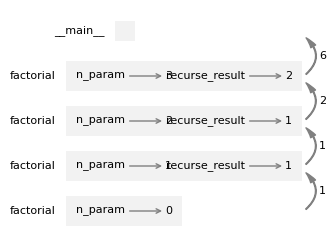

In [248]:
width, height, x_pos, y_pos = [2.74, 2.26, 0.73, 2.05] # 譯註：變數名修改
ax = diagram(width, height)
bbox = stack.draw(ax, x_pos, y_pos)
# adjust(x_pos, y_pos, bbox)

回傳值顯示為沿著堆疊向上传遞。
在每個框架中，回傳值是 `n_param` 和 `recurse_result` 的乘積。

在最後一個框架中，區域變數 `recurse_result` 不存在，因為創建它的分支沒有執行。

## 信念之躍 (Leap of faith)

追蹤執行流程是閱讀程式的一種方式，但它很快就會讓人不知所措。另一種方法是我稱之為「信念之躍」。當你遇到函式呼叫時，不要追蹤執行流程，而是*假設*函式運作正常並回傳正確的結果。

事實上，當你使用內建函式時，你已經在實踐這種信念之躍了。
當你呼叫 `abs` 或 `math.sqrt` 時，你不會檢查那些函式的主體——你只是假設它們可以運作。

當你呼叫自己的函式時也是如此。例如，前面我們寫了一個名為 `is_divisible` 的函式，它判斷一個數字是否能被另一個數字整除。一旦我們確信這個函式是正確的，我們就可以再次使用它而無需查看其主體。

遞迴程式也是如此。
當你到達遞迴呼叫時，不要追蹤執行流程，你應該假設遞迴呼叫可以運作，然後問自己：「假設我可以計算 $n-1$ 的階乘，我能計算 $n$ 的階乘嗎？」
階乘的遞迴定義意味著你可以，透過乘以 $n$。

當然，在你還沒寫完函式的時候就假設它能正確運作有點奇怪，但這就是為什麼它被稱為信念之躍！

## 費氏數列 (Fibonacci)

在 `factorial` 之後，最常見的遞迴函式範例是 `fibonacci`，它有以下定義：

$$\begin{aligned}
\mathrm{fibonacci}(0) &= 0 \\
\mathrm{fibonacci}(1) &= 1 \\
\mathrm{fibonacci}(n) &= \mathrm{fibonacci}(n-1) + \mathrm{fibonacci}(n-2)
\end{aligned}$$

轉換成 Python，它看起來像這樣：

In [9]:
def fibonacci(n_param): # 譯註：參數名修改
    if n_param == 0:
        return 0
    elif  n_param == 1:
        return 1
    else:
        return fibonacci(n_param-1) + fibonacci(n_param-2)

如果你試圖在這裡追蹤執行流程，即使是很小的 $n_param$ 值，你的腦袋也會爆炸。
但是根據信念之躍，如果你假設兩個遞迴呼叫都能正確運作，你就可以確信最後的 `return` 陳述句是正確的。

順帶一提，這種計算費氏數列的方法非常沒有效率。
在[第 10 章](section_memos)中，我將解釋原因並提出改進方法。 (譯註：此處的 section_memos 是書中連結)

## 檢查型別

如果我們呼叫 `factorial` 並給它 `1.5` 作為引數會發生什麼事？

get_ipython().run_cell_magic('expect', 'RecursionError', '\nfactorial(1.5)\n')
譯註：預期 RecursionError

In [14]:
get_ipython().run_cell_magic('expect', 'RecursionError', '\nfactorial(1.5)\n')

UsageError: Cell magic `%%expect` not found.


看起來像是無窮遞迴。怎麼會這樣呢？函式在 `n_param == 1` 或 `n_param == 0` 時有基礎案例。
但是如果 `n_param` 不是整數，我們可能會*錯過*基礎案例並永遠遞迴下去。

在這個例子中，`n_param` 的初始值是 `1.5`。
在第一次遞迴呼叫中，`n_param` 的值是 `0.5`。
在下一次，它是 `-0.5`。
從那裡開始，它變得越來越小（越來越負），但它永遠不會是 `0`。

為了避免無窮遞迴，我們可以使用內建函式 `isinstance` 來檢查引數的型別。
這是我們檢查一個值是否為整數的方法。

In [55]:
isinstance(3.3, float)

True

In [56]:
isinstance(1.5, int)

False

現在這裡是一個帶有錯誤檢查的 `factorial` 版本。

In [15]:
def factorial(n_param): # 譯註：參數名修改
    if not isinstance(n_param, int):
        print('階乘只對整數有定義。') # 譯註：將英文改為中文
        return None
    elif n_param < 0:
        print('階乘對負數沒有定義。')
        return None
    elif n_param == 0:
        return 1
    else:
        return n_param * factorial(n_param-1)

首先它檢查 `n_param` 是否為整數。
如果不是，它會顯示錯誤訊息並回傳 `None`。



In [57]:
factorial('松脆蛙') # 譯註：將英文改為中文

TypeError: unsupported operand type(s) for -: 'str' and 'int'

然後它檢查 `n_param` 是否為負數。
如果是，它會顯示錯誤訊息並回傳 `None`。

In [58]:
factorial(-2)

RecursionError: maximum recursion depth exceeded

In [61]:
factorial(7) +2

5042

如果我們通過了這兩個檢查，我們就知道 `n_param` 是一個非負整數，所以我們可以確信遞迴會終止。
檢查函式的參數以確保它們具有正確的型別和值，稱為 **輸入驗證** (input validation)。

## 除錯 (Debugging)

將一個大程式分解成較小的函式，為除錯創造了自然的檢查點。
如果一個函式無法運作，有三種可能性需要考慮：

-   函式收到的引數有問題——也就是說，違反了前置條件。

-   函式本身有問題——也就是說，違反了後置條件。

-   呼叫者對回傳值的處理有問題。

要排除第一種可能性，你可以在函式的開頭加入一個 `print` 陳述句，顯示參數的值（也許還有它們的型別）。
或者你可以編寫明確檢查前置條件的程式碼。

如果參數看起來沒問題，你可以在每個 `return` 陳述句之前加入一個 `print` 陳述句，並顯示回傳值。
如果可能，用容易檢查結果的引數來呼叫函式。

如果函式看起來運作正常，檢查函式呼叫以確保回傳值被正確使用——或者根本沒有被使用！

在函式的開頭和結尾加入 `print` 陳述句可以幫助使執行流程更清晰可見。
例如，這裡是一個帶有 print 陳述句的 `factorial` 版本：

In [62]:
def factorial(n_param): # 譯註：參數名修改
    space = ' ' * (4 * n_param) # 譯註：計算縮排空格數
    print(space, 'factorial', n_param)
    if n_param == 0:
        print(space, '回傳 1') # 譯註：將英文改為中文
        return 1
    else:
        recurse_result = factorial(n_param-1) # 譯註：變數名修改
        result_val = n_param * recurse_result # 譯註：變數名修改
        print(space, '回傳', result_val)
        return result_val

`space` 是一個由空格字元組成的字串，用來控制輸出的縮排。
這是 `factorial(3)` 的結果：

In [64]:
factorial(4)

                 factorial 4
             factorial 3
         factorial 2
     factorial 1
 factorial 0
 回傳 1
     回傳 1
         回傳 2
             回傳 6
                 回傳 24


24

如果你對執行流程感到困惑，這種輸出可能會有所幫助。
開發有效的鷹架需要一些時間，但是一點點鷹架可以節省大量的除錯時間。

## 詞彙表

**回傳值 (return value):**
函式的結果。如果函式呼叫被用作運算式，則回傳值是該運算式的值。

**純函式 (pure function):**
一個不顯示任何內容或具有任何其他效果（除了回傳回傳值）的函式。

**無效程式碼 (dead code) / 死碼:**
程式中永遠無法執行的部分，通常是因為它出現在 `return` 陳述句之後。

**漸進式開發 (incremental development):**
一種程式開發計畫，旨在透過一次只增加和測試少量程式碼來避免除錯。

**鷹架 (scaffolding):**
 在程式開發過程中使用的程式碼，但不是最終版本的一部分。

**圖靈完備 (Turing complete):**
如果一種語言或語言的子集可以執行任何可以用演算法描述的計算，則稱其為圖靈完備。

**輸入驗證 (input validation):**
檢查函式的參數以確保它們具有正確的型別和值。

## 練習

這個儲存格告訴 Jupyter 在發生執行期錯誤時提供詳細的除錯資訊。
在做練習之前先執行它。

In [257]:
get_ipython().run_line_magic('xmode', 'Verbose')

Exception reporting mode: Verbose


### 問問虛擬助理

在本章中，我們看到了一個不正確的函式，它可能在沒有回傳值的情況下結束。

In [258]:
def absolute_value_wrong(x_val): # 譯註：參數名修改
    if x_val < 0:
        return -x_val
    if x_val > 0:
        return x_val

以及同一個函式的另一個版本，其末尾有死碼。

In [259]:
def absolute_value_extra_return(x_val): # 譯註：參數名修改
    if x_val < 0:
        return -x_val
    else:
        return x_val

    return '這是永遠執行不到的程式碼。' # 譯註：將英文改為中文

我們還看到了以下範例，它是正確的，但不符合慣用寫法。

In [260]:
def is_divisible(x_val, y_val): # 譯註：參數名修改
    if x_val % y_val == 0:
        return True
    else:
        return False

問虛擬助理這些函式各有什麼問題，看看它是否能找出錯誤或改進風格。

然後問：「寫一個函式，它接受兩點的座標並計算它們之間的距離。」看看結果是否與我們在本章中編寫的 `distance` 版本相似。

### 練習

使用漸進式開發來編寫一個名為 `hypot` 的函式，給定直角三角形另外兩條邊的a,b長度，求回傳斜邊的長度。

注意：math 模組中有一個名為 `hypot` 的函式可以做同樣的事情，但你現在不要使用！

即使你第一次就能正確編寫函式，也要從一個總是回傳 `0` 的函式開始，並練習進行小的更改，邊做邊測試。
完成後，函式應該只回傳一個值——它不應該顯示任何東西。

解答 (第一步：基本框架)

In [65]:
def hypot(a, b):
    return 0.0 # 譯註：回傳浮點數 0.0 比較符合距離的概念

解答 (測試第一步)

In [66]:
hypot(3, 4)

0.0

解答 (第二步：計算平方和並印出)

In [67]:
def hypot(a, b):
    d_squared = a**2 + b**2 # 譯註：變數名 d2 改為 d_squared
    print("平方和是:", d_squared) # 譯註：加入 print 方便除錯，並改為中文
    return 0.0

解答 (測試第二步)

In [68]:
hypot(3, 4)

平方和是: 25


0.0

解答 (第三步：計算平方根並印出)

In [69]:
def hypot(a, b):
    d_squared = a**2 + b**2
    result_val = math.sqrt(d_squared) # 譯註：變數名改為 result_val
    print("斜邊長是:", result_val) # 譯註：加入 print 方便除錯，並改為中文
    return 0.0

解答 (測試第三步)

In [70]:
hypot(3, 4)

斜邊長是: 5.0


0.0

解答 (第四步：回傳結果，移除 print)

In [71]:
def hypot(a, b):
    d_squared = a**2 + b**2
    result_val = math.sqrt(d_squared)
    return result_val

解答 (測試第四步)

In [72]:
hypot(5, 12)

13.0

解答 (書中提供的另一種簡潔寫法，但練習要求漸進式開發)

In [269]:
def hypotenuse(a, b): # 譯註：函式名不同，作為對比
    return math.sqrt(a**2 + b**2)

解答 (再次測試我們的 hypot 函式)

In [73]:
hypot(3, 4)

5.0

### 練習

編寫一個布林函式 `is_between(x, y, z)`，如果 $x < y < z$ 或者 $z < y < x$，則回傳 `True`，否則回傳 `False`。
(譯註：意思是 y 是否在 x 和 z 之間，不包含等於的情況)

解答

In [76]:
def is_between(x_val, y_val, z_val): # 譯註：參數名修改
    if x_val < y_val < z_val:
        return True
    # elif z_val < y_val < x_val: # 譯註：原文 else 條件不完整，應為 elif
    #     return True
    # else:
    #     return False
    # 譯註：更簡潔的寫法可以是直接回傳比較結果
    return (x_val < y_val < z_val) or (z_val < y_val < x_val)

你可以使用這些範例來測試你的函式。

In [78]:
is_between(1, 2, 3)  # 應該是 True

True

In [77]:
is_between(3, 2, 1)  # 應該是 True

True

In [79]:
is_between(1, 3, 2)  # 應該是 False

False

In [275]:
is_between(2, 3, 1)  # 應該是 False

False

### 練習

阿克曼函式 (Ackermann function) $A(m, n)$ 的定義如下：

$$\begin{aligned}
A(m, n) = \begin{cases}
              n+1 & \mbox{如果 } m = 0 \\
        A(m-1, 1) & \mbox{如果 } m > 0 \mbox{ 且 } n = 0 \\
A(m-1, A(m, n-1)) & \mbox{如果 } m > 0 \mbox{ 且 } n > 0.
\end{cases}
\end{aligned}$$

編寫一個名為 `ackermann` 的函式來評估阿克曼函式。
如果你呼叫 `ackermann(5, 5)` 會發生什麼事？
(譯註：阿克曼函式增長非常快，即使是很小的輸入值，也可能導致遞迴深度過大或計算時間過長。)

解答

In [25]:
def ackermann(m_param, n_param): # 譯註：參數名修改
    """計算阿克曼函式 A(m, n)

    參考 http://en.wikipedia.org/wiki/Ackermann_function

    n_param, m_param: 非負整數
    """
    if not isinstance(m_param, int) or not isinstance(n_param, int):
        print("阿克曼函式只對整數有定義。")
        return None
    if m_param < 0 or n_param < 0:
        print("阿克曼函式只對非負整數有定義。")
        return None

    if m_param == 0:
        return n_param + 1
    if n_param == 0: # 譯註：原文此處條件為 m > 0 and n == 0，但因 m==0 已處理，故簡化
        return ackermann(m_param - 1, 1)
    # 譯註：原文此處條件為 m > 0 and n > 0，同理可簡化
    return ackermann(m_param - 1, ackermann(m_param, n_param - 1))

你可以使用這些範例來測試你的函式。

In [26]:
ackermann(3, 2)  # 應該是 29

29

In [27]:
ackermann(3, 3)  # 應該是 61

61

In [28]:
ackermann(3, 4)  # 應該是 125

125

如果你用大於 4 的值呼叫此函式，你會得到一個 `RecursionError`。
(譯註：對於 (3,4) 已經非常接近極限，(4,1) 就可能超出了，(5,5) 肯定會。)

get_ipython().run_cell_magic('expect', 'RecursionError', '\nackermann(5, 5)\n')
譯註：預期 RecursionError

要了解原因，請在函式開頭加入一個 print 陳述句來顯示參數的值，然後再次執行範例。

### 練習

如果一個數字 $a$ 可以被 $b$ 整除，並且 $a/b$
也是 $b$ 的次方，那麼 $a$ 就是 $b$ 的次方。編寫一個名為 `is_power` 的函式，它接受參數
`a` 和 `b`，如果 `a` 是 `b` 的次方，則回傳 `True`。注意：你
需要考慮基礎案例。
(譯註：例如 8 是 2 的次方，因為 8/2=4，4/2=2，2/2=1。基礎案例是 a=1。)

解答

In [80]:
def is_power(a_val, b_val): # 譯註：參數名修改
    """檢查 a_val 是否為 b_val 的次方
    """
    # 輸入驗證
    if not (isinstance(a_val, (int, float)) and isinstance(b_val, (int, float))):
        print("輸入必須是數字。")
        return False
    if b_val == 0:
        return a_val == 0 # 0 的 0 次方未定義，但 0 的正數次方是 0
    if b_val == 1:
        return a_val == 1 # 1 的任何次方都是 1 (除了 0 次方)

    # 基礎案例
    if a_val == 1: # 任何數的 0 次方是 1 (除了 0 的 0 次方)
        return True
    if a_val < 1 or a_val < b_val : # 如果 a 小於 b (且 a 不是 1)，或者 a 不是正數，則不可能是 b 的次方
        return False

    # 遞迴步驟
    if is_divisible(a_val, b_val): # is_divisible 是之前定義的函式
        return is_power(a_val / b_val, b_val)
    else:
        return False

你可以使用這些範例來測試你的函式。

In [82]:
is_power(65536, 2)   # 應該是 True (2^16)

True

In [83]:
is_power(27, 3)  # 應該是 True (3^3)

True

In [4]:
def my_test(a, b):
    print("a =", a,"b =", b)  # 譯註：將英文改為中文
    # math.log(a, b)  # 譯註：這裡的 math.log 是計算對數f
    return a+b

my_test(3, 4)  # 應該是 7


a = 3 b = 4


7

In [84]:
is_power(24, 2)  # 應該是 False

False

In [85]:
is_power(1, 17)   # 應該是 True (17^0)

True

### 練習

$a$ 和 $b$ 的最大公因數 (GCD) 是指能夠同時整除它們且沒有餘數的最大數字。

找到兩個數字的 GCD 的一種方法是基於以下觀察：
如果 $r$ 是 $a$ 除以 $b$ 的餘數，那麼 $gcd(a,
b) = gcd(b, r)$。作為基礎案例，我們可以使用 $gcd(a, 0) = a$。

編寫一個名為 `gcd` 的函式，它接受參數 `a` 和 `b` 並
回傳它們的最大公因數。

解答

In [2]:
def gcd(a_val, b_val): # 譯註：參數名修改
    # 輸入驗證 (可選，但良好實踐)
    if not (isinstance(a_val, int) and isinstance(b_val, int)):
        print("輸入必須是整數。")
        return None
    if a_val < 0 or b_val < 0:
        print("輸入必須是非負整數。") # 歐幾里得算法通常用於非負整數
        # 可以透過取絕對值來處理負數
        # a_val = abs(a_val)
        # b_val = abs(b_val)
        return None # 或者拋出錯誤

    if b_val == 0:
        return a_val
    else:
        return gcd(b_val, a_val % b_val)

你可以使用這些範例來測試你的函式。

In [8]:
gcd(333, 111)    # 應該是 4

111

In [287]:
gcd(13, 17)   # 應該是 1

1

In[ ]:

[Think Python: 3rd Edition](https://allendowney.github.io/ThinkPython/index.html)

Copyright 2024 [Allen B. Downey](https://allendowney.com)

程式碼授權: [MIT License](https://mit-license.org/)

文字授權: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)